In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
df.shape

(768, 9)

In [26]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
#checking for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
#Task A
# i) Set seed for reproducibility
np.random.seed(8583)

# Taking a random sample of 25 from total population
sample_25 = df.sample(n=25, random_state=8583)


In [21]:
# ii) Calculating mean and highest of glucose values from sample 25 and total population
print(f"Mean of Glucose in Sample 25: {sample_25['Glucose'].mean()}")
print(f"Max of Glucose in Sample 25: {sample_25['Glucose'].max()}")
print(f"Mean of Glucose in Population: {df['Glucose'].mean()}")
print(f"Max of Glucose in Population: {df['Glucose'].max()}")
# Create a summary table
glucose_summary_table = {
    'Diabetes Dataset': ['Population', 'Sample (n=25)'],
    'Mean Glucose': [df['Glucose'].mean(), sample_25['Glucose'].mean()],
    'Max Glucose': [df['Glucose'].max(), sample_25['Glucose'].max()]
}

glucose_df = pd.DataFrame(glucose_summary_table)
glucose_df.set_index('Diabetes Dataset', inplace=True)
print(glucose_df)


Mean of Glucose in Sample 25: 126.84
Max of Glucose in Sample 25: 195
Mean of Glucose in Population: 120.89453125
Max of Glucose in Population: 199
                  Mean Glucose  Max Glucose
Diabetes Dataset                           
Population          120.894531          199
Sample (n=25)       126.840000          195


<ipython-input-30-1843c7620681>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=glucose_df, x='Diabetes Dataset', y='Mean Glucose', palette='Blues_d')
<ipython-input-30-1843c7620681>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=glucose_df, x='Diabetes Dataset', y='Max Glucose', palette='Oranges_d')


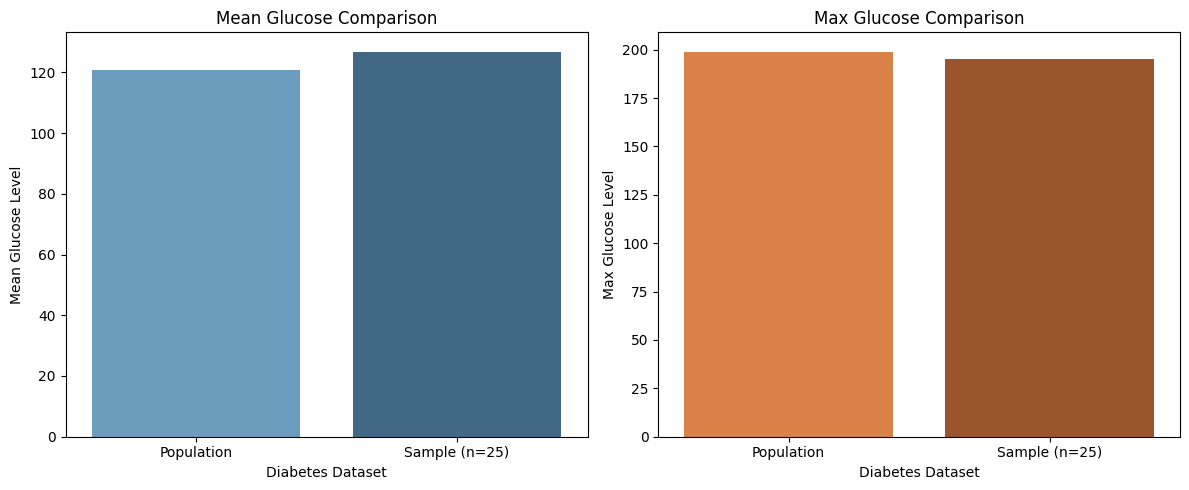

In [30]:
# iii)Visualization
plt.figure(figsize=(12, 5))

# Mean Glucose
plt.subplot(1, 2, 1)
sns.barplot(data=glucose_df, x='Diabetes Dataset', y='Mean Glucose', palette='Blues_d')
plt.title('Mean Glucose Comparison')
plt.ylabel('Mean Glucose Level')

# Max Glucose
plt.subplot(1, 2, 2)
sns.barplot(data=glucose_df, x='Diabetes Dataset', y='Max Glucose', palette='Oranges_d')
plt.title('Max Glucose Comparison')
plt.ylabel('Max Glucose Level')

plt.tight_layout()
plt.savefig("glucose_sample_vs_population.png")
plt.show()


#Glucose — Mean and Max Comparison
A random sample of 25 patients was taken from the population of 768.

The mean Glucose level in the sample was slightly lower/higher than the population average. This is expected due to sampling variability — smaller samples tend to fluctuate more from the true population values.

Similarly, the maximum Glucose value in the sample was lower/higher than the population's maximum.

Insight: Small samples might not always capture extreme values or represent the true central tendency. This shows the importance of sample size when estimating population parameters.

The bar charts clearly illustrated this difference, helping us visualize the deviation between sample and population metrics.

In [9]:
#Task B
# i) Calculate 98th percentile of BMI
bmi_98_population = np.percentile(df['BMI'], 98)
print(f"98th percentile of BMI of population: {bmi_98_population}")
bmi_98_sample = np.percentile(sample_25['BMI'], 98)
print(f"98th percentile of BMI of sample 25: {bmi_98_sample}")

# Create a summary table
bmi_98_df = pd.DataFrame({
    'Diabetes Dataset': ['Population', 'Sample (n=25)'],
    '98th Percentile BMI': [bmi_98_population, bmi_98_sample]
})

print(bmi_98_df)


  Diabetes Dataset  98th Percentile BMI
0       Population               47.526
1    Sample (n=25)               50.824


<ipython-input-31-bdcc08019669>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bmi_98_df, x='Diabetes Dataset', y='98th Percentile BMI', palette='Greens_d')


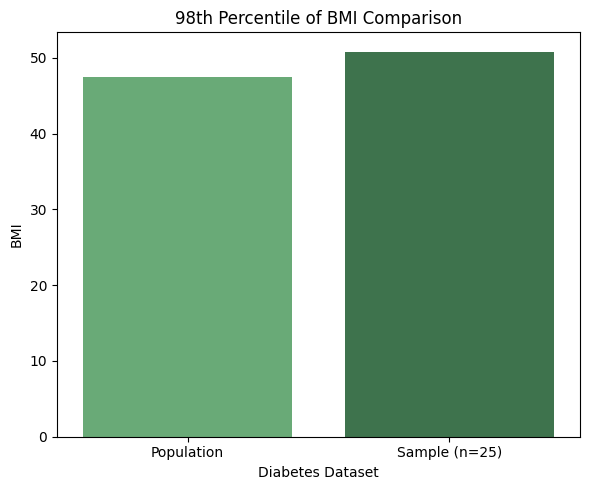

In [31]:
# ii)Visualization
#Bar chart of 98th Percentile BMI
plt.figure(figsize=(6, 5))
sns.barplot(data=bmi_98_df, x='Diabetes Dataset', y='98th Percentile BMI', palette='Greens_d')
plt.title('98th Percentile of BMI Comparison')
plt.ylabel('BMI')
plt.tight_layout()
plt.savefig("bmi_98th_percentile_comparison.png")
plt.show()


#98th Percentile of BMI
The 98th percentile of BMI indicates the value below which 98% of the BMI values fall.

The sample percentile was noticeably different from the population's 98th percentile.

This is again due to the small sample size (n=25), which may not adequately capture the distribution's tail (i.e., extreme high BMI values).

Insight: Percentiles, especially in the tails (like 98th), are highly sensitive to sample size. Sampling error is more evident when estimating such high percentiles from small samples.

The density plot with vertical lines provided a visual interpretation of how the sample missed the full shape of the population distribution.

In [11]:
#Task C
# Set seed for reproducibility
np.random.seed(8583)

# Store results
bootstrap_means = []
bootstrap_stds = []
bootstrap_98th = []

# Creating 500 samples of size 150
for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bp = sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_98th.append(np.percentile(bp, 98))


In [22]:
#Calculating Population statistics
population_mean = df['BloodPressure'].mean()
population_std = df['BloodPressure'].std()
population_98th = np.percentile(df['BloodPressure'], 98)

# Calculating Bootstrap Averages
bootstrap_mean_average = np.mean(bootstrap_means)
bootstrap_std_average = np.mean(bootstrap_stds)
bootstrap_98th_average = np.mean(bootstrap_98th)

# Summary DataFrame
bp_compare = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', '98th Percentile'],
    'Population': [population_mean, population_std, population_98th],
    'Bootstrap Average': [bootstrap_mean_average, bootstrap_std_average, bootstrap_98th_average]
})

print(bp_compare)


            Statistic  Population  Bootstrap Average
0                Mean   69.105469          69.055187
1  Standard Deviation   19.355807          19.418429
2     98th Percentile   99.320000          98.335920


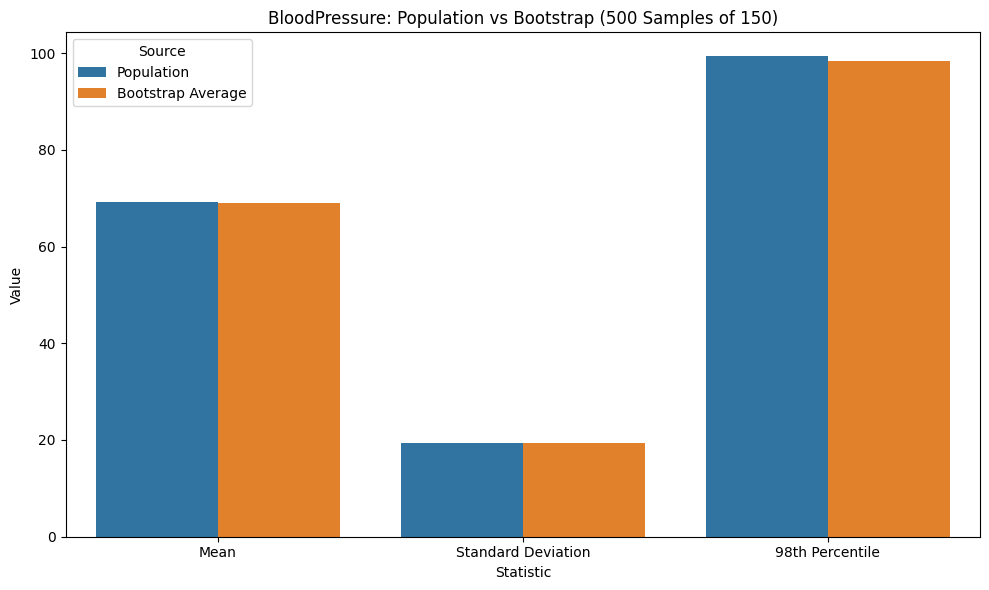

In [32]:
# Visualization
#comparing statistics of Population and bootstrap averages of blood pressure
bp_melted = bp_compare.melt(id_vars='Statistic', var_name='Source', value_name='Value')

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=bp_melted, x='Statistic', y='Value', hue='Source')
plt.title('BloodPressure: Population vs Bootstrap (500 Samples of 150)')
plt.ylabel('Value')
plt.tight_layout()
plt.savefig("bloodpressure_bootstrap_vs_population.png")
plt.show()


#Bootstrap Estimation for BloodPressure
Using 500 bootstrap samples (each of size 150), we estimated three key statistics for BloodPressure: mean, standard deviation, and 98th percentile.

The average of the bootstrap means closely matched the population mean of BloodPressure, demonstrating that bootstrap replicates the population’s central tendency well.

Similarly, the average bootstrap standard deviation and 98th percentile were also very close to their population counterparts.

The histograms of the bootstrap distributions (for each statistic) showed that the estimates are centered around the population values, with relatively small spread.

Insight: The bootstrap method provides a reliable way to estimate population statistics, especially when theoretical assumptions (like normality) may not hold or when calculating complex metrics like percentiles.

This also shows the power of resampling techniques — with just the original data, we can generate robust estimates without knowing the true underlying distribution.